In [4]:
# Creating a function to take in new data files in similar format as dna_raw.txt with
# different number of sequences, and produce the same results above

import re
import matplotlib.pyplot as plt

def find_sequences_in(file_name):   
        
    with open(file_name, "r") as f:     
        data = f.read()
        print(f"The printed text:\n {data}")

    lines = data.lower().split("\n")    # Splitting lines, no white spaces
    
    seq_letters = []  
    seq_n = []
    all_sequences = {}

    for line in lines:
        if line.startswith(">") and re.match(r">seq\d+", line):
            seq_n = line
            all_sequences[seq_n] = ""     #seq_n becomes the key of the dict all_sequences and and the value is empty
        elif seq_n and line:
            all_sequences[seq_n] += line.replace(" ", "")# counts one more line
        #else:
            #line = seq_letters
    

    #letters_counts_all ={}
    for seq_n, letters in all_sequences.items():
        letter_counts = {"a": 0, "c": 0, "g": 0, "t": 0}

        for letter in letters:
            if letter in letter_counts:
                letter_counts[letter] +=1

        print(f"{seq_n} = {letter_counts}")

        fig, ax = plt.subplots()                            # bar chart creation, removed a function that I used at first after talking at the stuga
        dna_letters = list(letter_counts.keys())
        frequency = list(letter_counts.values())
        bar_colors = ['tab:red']
        ax.bar(dna_letters, frequency, color=bar_colors)
        plt.xlabel("DNA Letters")
        ax.set_ylabel("Frequency")
        ax.set_title(f"DNA {seq_n}")
        plt.show()

    return all_sequences

The printed text:
 >seq1
cGTAaccaataaaaaaacaagcttaacctaattc
>seq2
agcttagTTTGGatctggccgggg
>seq3
gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca
>seq4
gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca
>seq1 = {'a': 17, 'c': 8, 'g': 2, 't': 7}


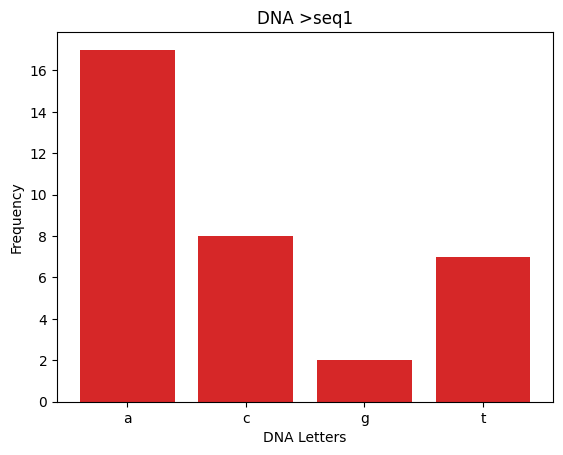

>seq2 = {'a': 3, 'c': 4, 'g': 10, 't': 7}


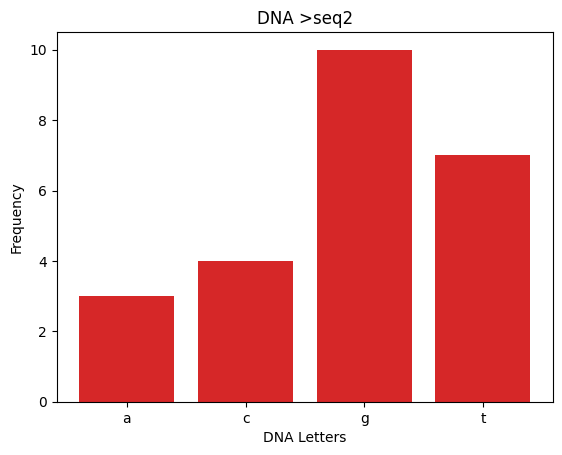

>seq3 = {'a': 18, 'c': 16, 'g': 16, 't': 10}


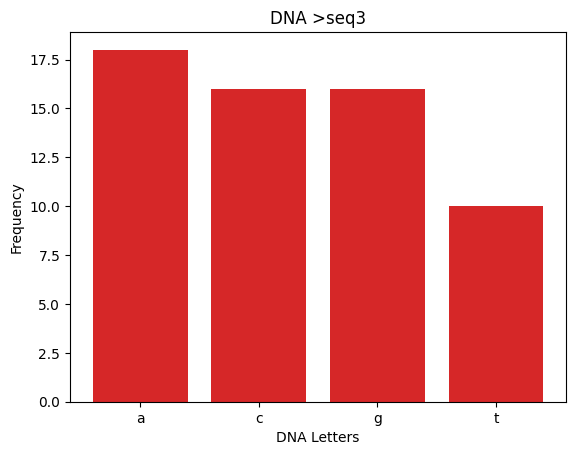

>seq4 = {'a': 13, 'c': 11, 'g': 18, 't': 10}


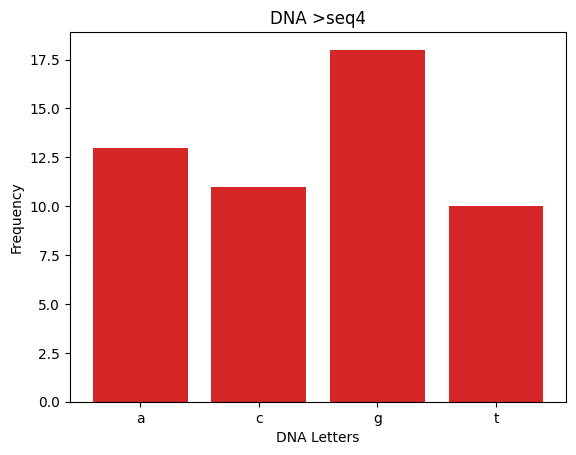

{'>seq1': 'cgtaaccaataaaaaaacaagcttaacctaattc',
 '>seq2': 'agcttagtttggatctggccgggg',
 '>seq3': 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca',
 '>seq4': 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca'}

In [7]:
find_sequences_in("dna_raw.txt")